# Final Project: Classification with Python

**=================================================================================================================**

# Instructions

In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 

**=================================================================================================================**

# About The Dataset

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## Data Dictionary

This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

## Data Tasks

### 1) Understand the shape of the data (Histograms, box plots, etc.)

### 2) Data Cleaning 

### 3) Data Exploration

### 4) Feature Engineering 

### 5) Data Preprocessing for Model

### 6) Basic Model Building 

### 7) Model Tuning 

### 8) Ensemble Model Building 

### 9) Results 

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, Binarizer, OrdinalEncoder

from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config

set_config(transform_output="pandas")


from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, HalvingRandomSearchCV
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import jaccard_score, log_loss, mean_squared_error, mean_absolute_error, r2_score

from sklearn.feature_selection import f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import imblearn

from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC 
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.metrics import classification_report_imbalanced
#from imblearn.pipeline import Pipeline

import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df.head()

,date,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-02-01,19.50,22.40,15.60,6.20,0.00,W,41,S,SSW,17,20,92,84,1017.60,1017.40,8,8,20.70,20.90,Yes,1
1,2008-02-02,19.50,25.60,6.00,3.40,2.70,W,41,W,E,9,13,83,73,1017.90,1016.40,7,7,22.40,24.80,Yes,1
2,2008-02-03,21.60,24.50,6.60,2.40,0.10,W,41,ESE,ESE,17,2,88,86,1016.70,1015.60,7,8,23.50,23.00,Yes,1
3,2008-02-04,20.20,22.80,18.80,2.20,0.00,W,41,NNE,E,22,20,83,90,1014.20,1011.80,8,8,21.40,20.90,Yes,1
4,2008-02-05,19.70,25.70,77.40,4.80,0.00,W,41,NNE,W,11,6,88,74,1008.30,1004.80,8,8,22.50,25.50,Yes,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3271 non-null   object 
 1   mintemp        3271 non-null   float64
 2   maxtemp        3271 non-null   float64
 3   rainfall       3271 non-null   float64
 4   evaporation    3271 non-null   float64
 5   sunshine       3271 non-null   float64
 6   windgustdir    3271 non-null   object 
 7   windgustspeed  3271 non-null   int64  
 8   winddir9am     3271 non-null   object 
 9   winddir3pm     3271 non-null   object 
 10  windspeed9am   3271 non-null   int64  
 11  windspeed3pm   3271 non-null   int64  
 12  humidity9am    3271 non-null   int64  
 13  humidity3pm    3271 non-null   int64  
 14  pressure9am    3271 non-null   float64
 15  pressure3pm    3271 non-null   float64
 16  cloud9am       3271 non-null   int64  
 17  cloud3pm       3271 non-null   int64  
 18  temp9am 

In [5]:
df.dtypes.value_counts()

float64    9
int64      8
object     5
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,date,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
count,3271,3271.00,3271.00,3271.00,3271.00,3271.00,3271,3271.00,3271,3271,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271,3271.00
unique,3271,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,2008-02-01,NaN,NaN,NaN,NaN,NaN,W,NaN,W,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,1425,NaN,1260,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2422,NaN
mean,NaN,14.88,23.01,3.34,5.18,7.17,NaN,41.48,NaN,NaN,15.08,19.29,68.24,54.70,1018.33,1016.00,4.32,4.18,17.82,21.54,NaN,0.26
std,NaN,4.55,4.48,9.92,2.76,3.82,NaN,10.81,NaN,NaN,7.04,7.45,15.09,16.28,7.02,7.02,2.53,2.41,4.89,4.30,NaN,0.44
min,NaN,4.30,11.70,0.00,0.00,0.00,NaN,17.00,NaN,NaN,0.00,0.00,19.00,10.00,986.70,989.80,0.00,0.00,6.40,10.20,NaN,0.00
25%,NaN,11.00,19.60,0.00,3.20,4.25,NaN,35.00,NaN,NaN,11.00,15.00,58.00,44.00,1013.70,1011.30,2.00,2.00,13.80,18.40,NaN,0.00
50%,NaN,14.90,22.80,0.00,4.80,8.30,NaN,41.00,NaN,NaN,15.00,19.00,69.00,56.00,1018.60,1016.30,5.00,4.00,18.20,21.30,NaN,0.00
75%,NaN,18.80,26.00,1.40,7.00,10.20,NaN,44.00,NaN,NaN,20.00,24.00,80.00,64.00,1023.10,1020.80,7.00,7.00,21.70,24.50,NaN,1.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintomorrow
count,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00,3271.00
mean,14.88,23.01,3.34,5.18,7.17,41.48,15.08,19.29,68.24,54.70,1018.33,1016.00,4.32,4.18,17.82,21.54,0.26
std,4.55,4.48,9.92,2.76,3.82,10.81,7.04,7.45,15.09,16.28,7.02,7.02,2.53,2.41,4.89,4.30,0.44
min,4.30,11.70,0.00,0.00,0.00,17.00,0.00,0.00,19.00,10.00,986.70,989.80,0.00,0.00,6.40,10.20,0.00
25%,11.00,19.60,0.00,3.20,4.25,35.00,11.00,15.00,58.00,44.00,1013.70,1011.30,2.00,2.00,13.80,18.40,0.00
50%,14.90,22.80,0.00,4.80,8.30,41.00,15.00,19.00,69.00,56.00,1018.60,1016.30,5.00,4.00,18.20,21.30,0.00
75%,18.80,26.00,1.40,7.00,10.20,44.00,20.00,24.00,80.00,64.00,1023.10,1020.80,7.00,7.00,21.70,24.50,1.00
max,27.60,45.80,119.40,18.40,13.60,96.00,54.00,57.00,100.00,99.00,1039.00,1036.70,9.00,8.00,36.50,44.70,1.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,date,windgustdir,winddir9am,winddir3pm,raintoday
count,3271,3271,3271,3271,3271
unique,3271,16,16,16,2
top,2008-02-01,W,W,E,No
freq,1,1425,1260,624,2422


In [9]:
df.raintomorrow.value_counts(normalize=True)

0   0.74
1   0.26
Name: raintomorrow, dtype: float64

In [10]:
df.shape

(3271, 22)

In [11]:
df.columns

Index(['date', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'raintomorrow'], dtype='object')

In [12]:
df.isnull().sum()

date             0
mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

In [13]:
df.duplicated().sum()

0

## Data Visualization

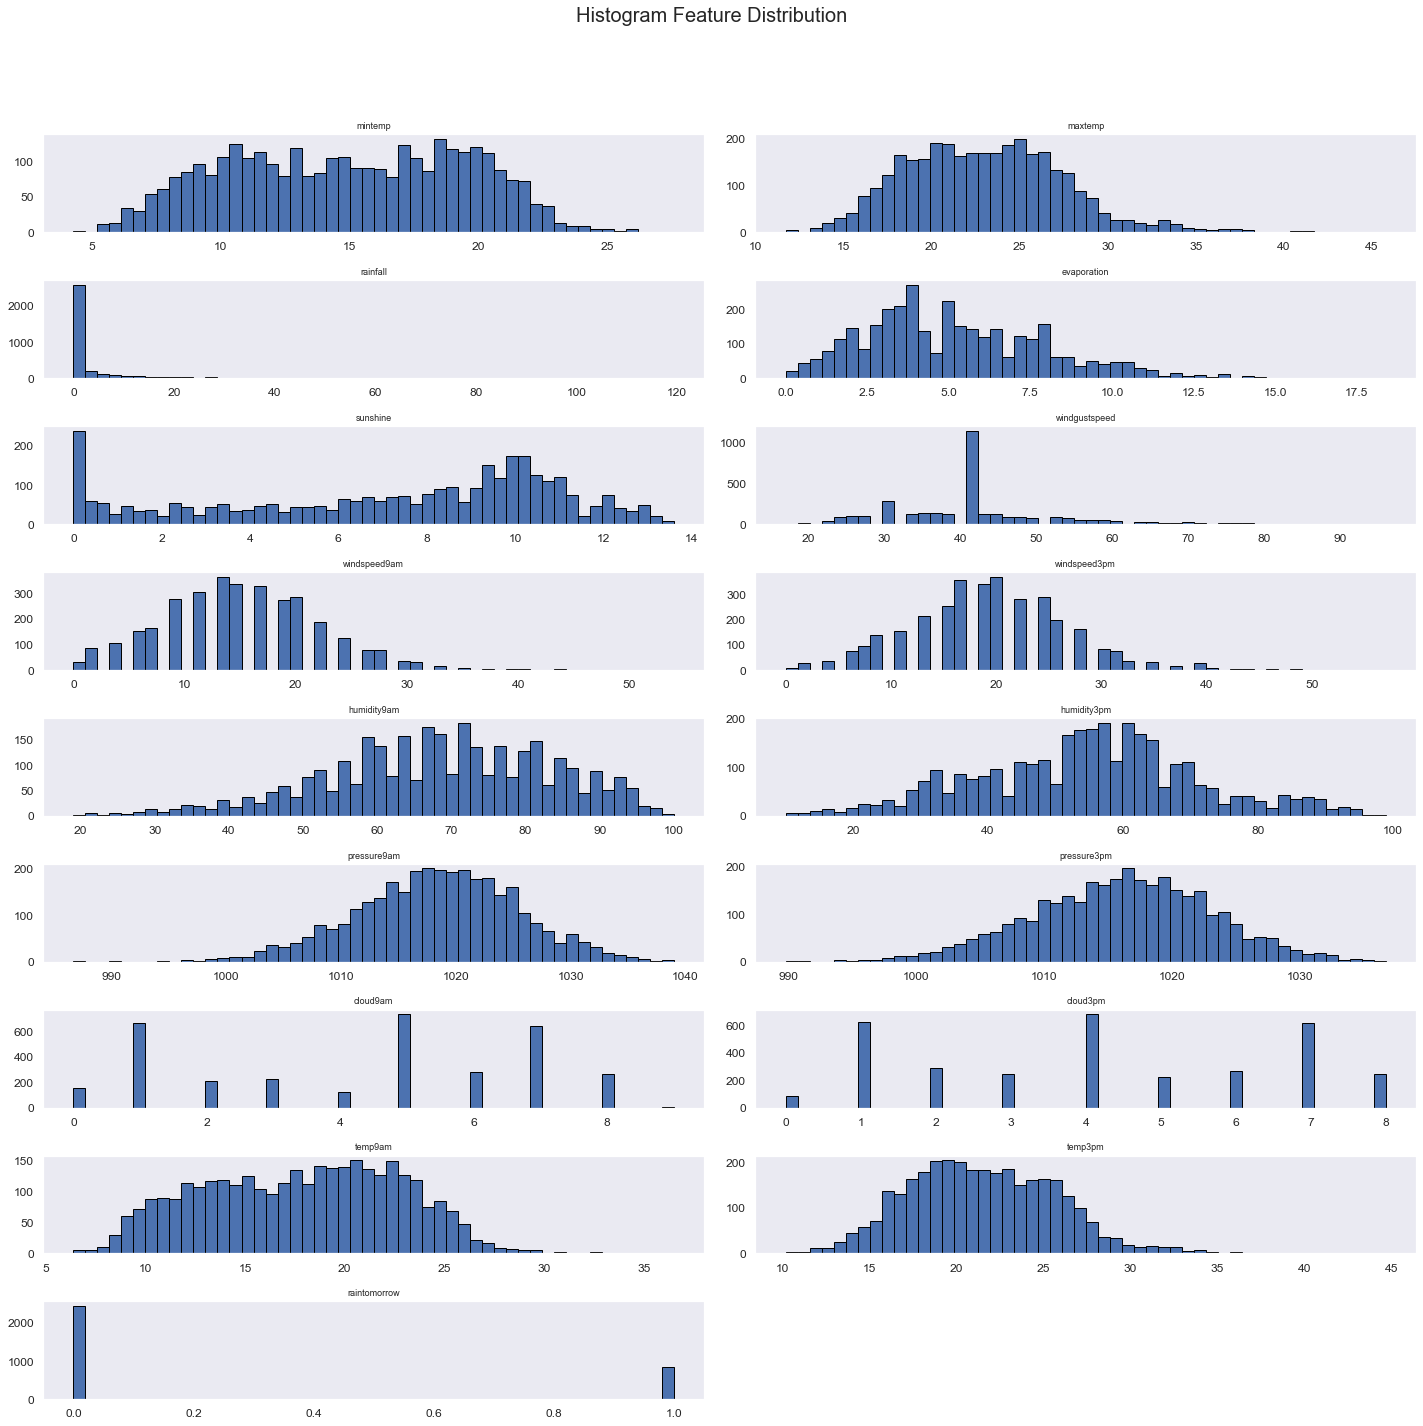

In [14]:
df.hist(bins=50, figsize=(20,45), grid=False, layout=(len(df.columns),2), edgecolor = 'black')
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

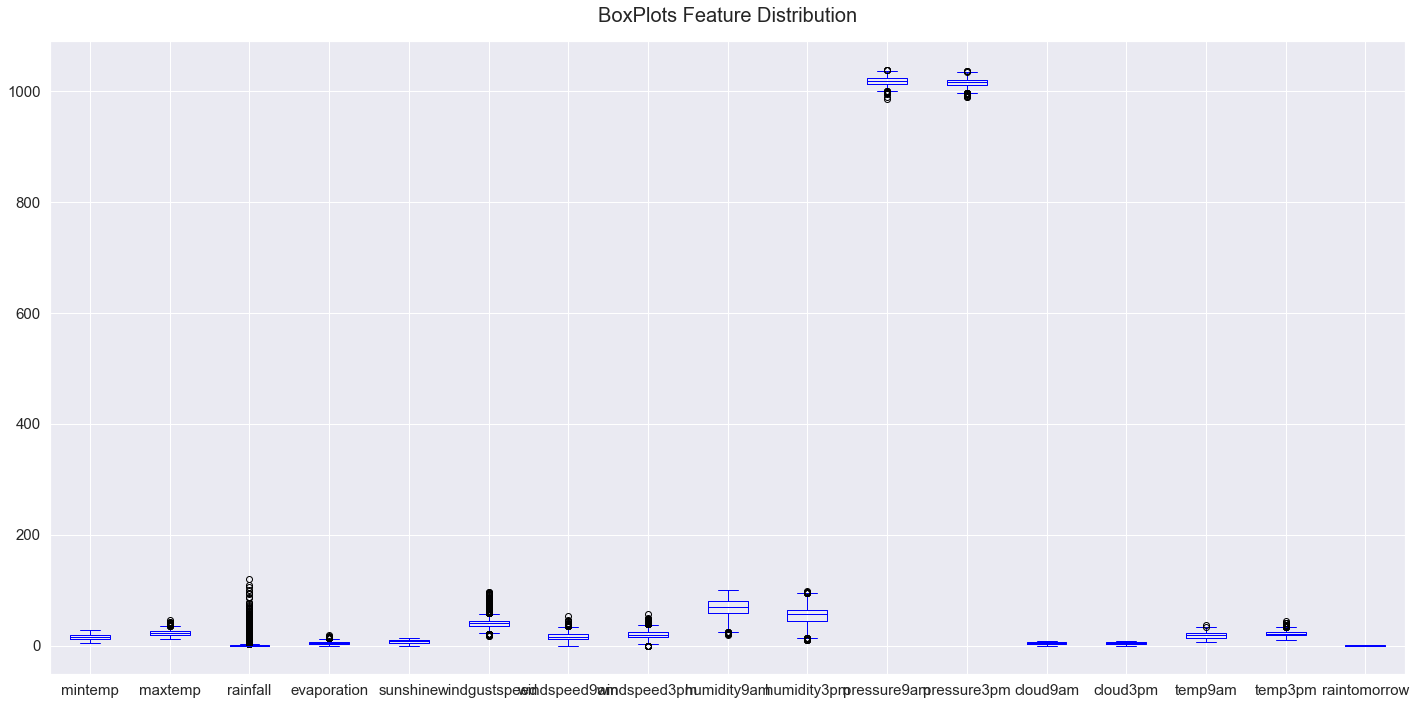

In [15]:
df.boxplot(figsize=(20,10), color="blue", fontsize = 15)
plt.title('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

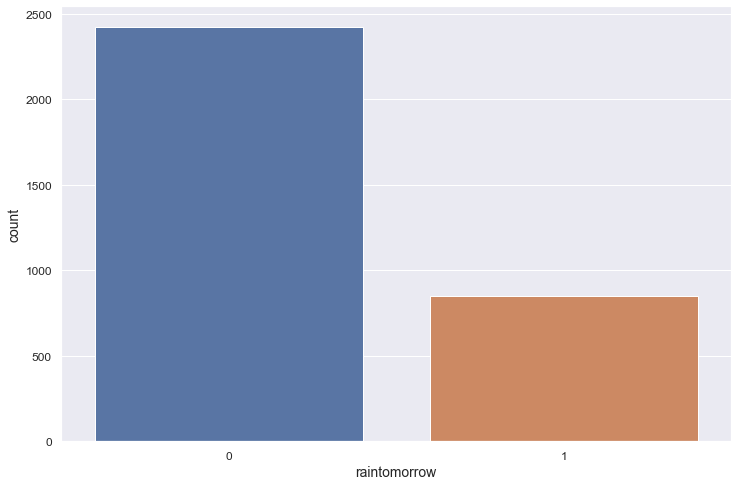

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=df.raintomorrow, data=df)
plt.show()

In [18]:
df.corr()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintomorrow
mintemp,1.00,0.77,0.01,0.57,-0.06,0.13,-0.30,0.23,0.05,0.27,-0.39,-0.35,0.24,0.16,0.94,0.75,0.08
maxtemp,0.77,1.00,-0.14,0.51,0.33,0.07,-0.35,0.16,-0.19,-0.15,-0.39,-0.42,-0.08,-0.10,0.86,0.96,-0.15
rainfall,0.01,-0.14,1.00,-0.11,-0.31,0.15,0.15,0.04,0.33,0.31,-0.04,0.00,0.25,0.20,-0.05,-0.14,0.30
evaporation,0.57,0.51,-0.11,1.00,0.18,0.25,-0.08,0.29,-0.40,-0.10,-0.34,-0.30,-0.04,-0.04,0.61,0.47,-0.07
sunshine,-0.06,0.33,-0.31,0.18,1.00,-0.03,-0.06,0.18,-0.49,-0.59,-0.05,-0.09,-0.67,-0.68,0.11,0.35,-0.53
windgustspeed,0.13,0.07,0.15,0.25,-0.03,1.00,0.26,0.51,-0.23,-0.10,-0.41,-0.35,0.02,0.04,0.16,0.04,0.15
windspeed9am,-0.30,-0.35,0.15,-0.08,-0.06,0.26,1.00,0.20,-0.19,-0.15,0.00,0.09,-0.06,-0.02,-0.33,-0.35,0.07
windspeed3pm,0.23,0.16,0.04,0.29,0.18,0.51,0.20,1.00,-0.29,-0.14,-0.33,-0.28,-0.05,-0.10,0.28,0.14,-0.01
humidity9am,0.05,-0.19,0.33,-0.40,-0.49,-0.23,-0.19,-0.29,1.00,0.66,0.26,0.25,0.43,0.33,-0.15,-0.16,0.34
humidity3pm,0.27,-0.15,0.31,-0.10,-0.59,-0.10,-0.15,-0.14,0.66,1.00,0.15,0.18,0.46,0.47,0.13,-0.21,0.48


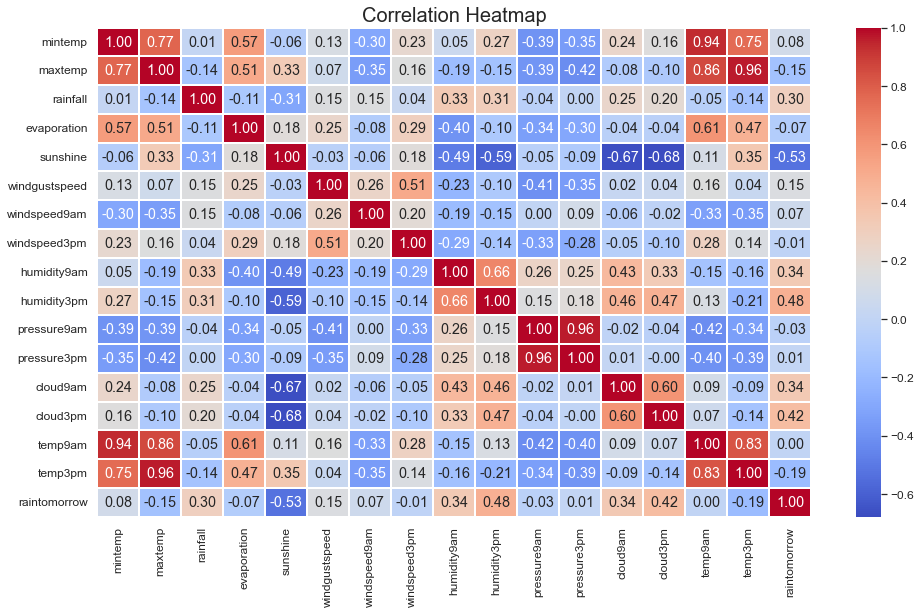

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==================================================================================================================**

## Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.

<img src="trin-test.png">

In [20]:
df.shape

(3271, 22)

In [21]:
X = df.iloc[:,0:21]
y = df.iloc[:,21]

In [22]:
X.values, y.values

(array([['2008-02-01', 19.5, 22.4, ..., 20.7, 20.9, 'Yes'],
        ['2008-02-02', 19.5, 25.6, ..., 22.4, 24.8, 'Yes'],
        ['2008-02-03', 21.6, 24.5, ..., 23.5, 23.0, 'Yes'],
        ...,
        ['2017-06-23', 9.4, 17.7, ..., 10.2, 17.3, 'No'],
        ['2017-06-24', 10.1, 19.3, ..., 12.4, 19.0, 'No'],
        ['2017-06-25', 7.6, 19.3, ..., 9.4, 18.8, 'No']], dtype=object),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2616, 21), (655, 21), (2616,), (655,))

In [25]:
Counter(y_train), Counter(y_test)

(Counter({0: 1937, 1: 679}), Counter({0: 485, 1: 170}))

**==================================================================================================================**

In [26]:
y.value_counts()

0    2422
1     849
Name: raintomorrow, dtype: int64

In [27]:
(y == 0).sum() / (y == 1).sum() 

2.852767962308598

**=================================================================================================================**

## Data Pipelines

Data Pipelines simplify the steps of processing the data. We use the module <code>Pipeline</code> to create a pipeline. 
`Pipeline` lets you chain together multiple operators on your data that both have a `fit` method.

### Combine multiple processing steps into a `Pipeline`

A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step.  

In [28]:
# Declare preprocessing functions

#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#ohe = OneHotEncoder()
#oe = OrdinalEncoder()
#ss = StandardScaler()
#mm = MinMaxScaler()
#skbest = SelectKBest()

In [29]:
list(df.select_dtypes(include=["int64","float64"]))

['mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'windgustspeed',
 'windspeed9am',
 'windspeed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'temp9am',
 'temp3pm',
 'raintomorrow']

In [30]:
list(df.select_dtypes(include=["bool","object"]))

['date', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday']

In [31]:
dropcols = ['date']

In [32]:
numcols = ['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed', 'windspeed9am', 'windspeed3pm',
 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm']

In [33]:
catcols = ['windgustdir', 'winddir9am', 'winddir3pm', 'raintoday']

In [34]:
# We create the preprocessing pipelines for both
# numerical and categorical data


drop_transformer = ColumnTransformer(transformers=
                                    ("dropcolumns", "drop", dropcols)
                                    )

numeric_transformer = Pipeline(steps=[
                              #("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')),
                              #("scalar", StandardScaler()),
                               ("minmax", MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    
                                  #("imputer", SimpleImputer(strategy="most_frequent")),
                                  #("onehot", OneHotEncoder(sparse_output=False, drop ='if_binary')),
                                   ("ordinal", OrdinalEncoder(categories='auto'))
    
    
])

In [35]:
preprocessor = ColumnTransformer(
               transformers=[
                           ("dropcolumns", "drop", dropcols),
                           ("numerical", numeric_transformer, numcols),
                           ("categorical", categorical_transformer, catcols),
                   
                            ],
               remainder="passthrough",
               verbose_feature_names_out=False)

**=================================================================================================================**

# Linear Regression

In [36]:
lrpipeline = Pipeline(steps=
                     [
                      ("preprocessing", preprocessor),  
                      ( "linreg",  LinearRegression())
                     ])

In [37]:
lrpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcolumns', 'drop',
                                                  ['date']),
                                                 ('numerical',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['mintemp', 'maxtemp',
                                                   'rainfall', 'evaporation',
                                                   'sunshine', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm',
                                                   'humidity9am', 'humidity3pm',
                                                   'pressure9am', 'pressure3pm',
                                                   'cloud9am', 'cloud3pm',
                                                   'temp9am', 'temp3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['windgustdir', 'winddir9am',
                                                   'winddir3pm',
                                                   'raintoday'])],
                                   verbose_feature_names_out=False)),
                ('linreg', LinearRegression())])

In [38]:
lrpipeline.predict(X_test)[0:5]

array([ 0.06274677,  0.9693418 ,  0.77266864,  0.44409362, -0.01836328])

In [39]:
lr_pred = lrpipeline.predict(X_test)

In [40]:
print("MAE:", "%.3f" % mean_absolute_error(y_test, lr_pred))
print("MSE:", "%.3f" % mean_squared_error(y_test, lr_pred))
print("R2:", "%.3f" % r2_score(y_test, lr_pred))

MAE: 0.266
MSE: 0.126
R2: 0.345


In [41]:
lrtable = pd.DataFrame()
lrtable = lrtable.append({'Model': "Linear Regression",
                        'MAE':  mean_absolute_error(y_test, lr_pred),
                        'MSE': mean_squared_error(y_test, lr_pred),
                        'R2': r2_score(y_test, lr_pred),
                        
                      },
                        ignore_index=True)
                     
lrtable

,Model,MAE,MSE,R2
0,Linear Regression,0.27,0.13,0.35


**=================================================================================================================**

# KNN

In [42]:
knnpipeline = Pipeline(steps=
                     [
                      ("preprocessing", preprocessor),  
                      ( "knn",  KNeighborsClassifier(n_neighbors=4, n_jobs=-1))
                     ])

In [43]:
knnpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcolumns', 'drop',
                                                  ['date']),
                                                 ('numerical',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['mintemp', 'maxtemp',
                                                   'rainfall', 'evaporation',
                                                   'sunshine', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm',
                                                   'humidity9am', 'humidity3pm',
                                                   'pressure9am', 'pressure3pm',
                                                   'cloud9am', 'cloud3pm',
                                                   'temp9am', 'temp3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['windgustdir', 'winddir9am',
                                                   'winddir3pm',
                                                   'raintoday'])],
                                   verbose_feature_names_out=False)),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=4))])

In [44]:
knnpipeline.predict(X_test)[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [45]:
knn_pred = knnpipeline.predict(X_test)

In [46]:
print("KNN Classifier\n")
print("Accuracy:", "%.3f" % accuracy_score(y_test, knn_pred))
print("Jaccard Score:", "%.3f" % jaccard_score(y_test, knn_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, knn_pred))

KNN Classifier

Accuracy: 0.777
Jaccard Score: 0.247
F1 Score: 0.397


In [47]:
knntable = pd.DataFrame()
knntable = knntable.append({'Model': "KNN Classification",
                        'F1':  f1_score(y_test, knn_pred),
                        'Jaccard Score': jaccard_score(y_test, knn_pred),
                        'Accuracy': accuracy_score(y_test, knn_pred)
                      },
                        ignore_index=True)
                     
knntable

,Model,F1,Jaccard Score,Accuracy
0,KNN Classification,0.40,0.25,0.78


# Decision Tree

In [48]:
dtpipeline = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("decisiontree", DecisionTreeClassifier(random_state=0, class_weight={0:1, 1:3}))
                    
])

In [49]:
dtpipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcolumns', 'drop',
                                                  ['date']),
                                                 ('numerical',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['mintemp', 'maxtemp',
                                                   'rainfall', 'evaporation',
                                                   'sunshine', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm',
                                                   'humidity9am', 'humidity3pm',
                                                   'pressure9am', 'pressure3pm',
                                                   'cloud9am', 'cloud3pm',
                                                   'temp9am', 'temp3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['windgustdir', 'winddir9am',
                                                   'winddir3pm',
                                                   'raintoday'])],
                                   verbose_feature_names_out=False)),
                ('decisiontree',
                 DecisionTreeClassifier(class_weight={0: 1, 1: 3},
                                        random_state=0))])

In [50]:
dtpred = dtpipeline.predict(X_test)

In [51]:
dtpred[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [52]:
print("Decision Tree Classifier\n")
print("Accuracy:", "%.3f" % accuracy_score(y_test, dtpred))
print("Jaccard Score:", "%.3f" % jaccard_score(y_test, dtpred))
print("F1 Score:", "%.3f" % f1_score(y_test, dtpred))

Decision Tree Classifier

Accuracy: 0.750
Jaccard Score: 0.352
F1 Score: 0.520


In [53]:
dttable = pd.DataFrame()
dttable = dttable.append({'Model': "Decision Tree Classifier",
                        'F1':  f1_score(y_test, dtpred),
                        'Jaccard Score': jaccard_score(y_test, dtpred),
                        'Accuracy': accuracy_score(y_test, dtpred)
                      },
                        ignore_index=True)
                     
dttable

,Model,F1,Jaccard Score,Accuracy
0,Decision Tree Classifier,0.52,0.35,0.75


**=================================================================================================================**

# Logistic Regression

In [54]:
logrpipeline = Pipeline(steps=
                     [
                      ("preprocessing", preprocessor),  
                      ( "logreg",  LogisticRegression(random_state=0, class_weight={0:1, 1:3}, solver="liblinear"))
                     ])

In [55]:
logrpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcolumns', 'drop',
                                                  ['date']),
                                                 ('numerical',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['mintemp', 'maxtemp',
                                                   'rainfall', 'evaporation',
                                                   'sunshine', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm',
                                                   'humidity9am', 'humidity3pm',
                                                   'pressure9am', 'pressure3pm',
                                                   'cloud9am', 'cloud3pm',
                                                   'temp9am', 'temp3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['windgustdir', 'winddir9am',
                                                   'winddir3pm',
                                                   'raintoday'])],
                                   verbose_feature_names_out=False)),
                ('logreg',
                 LogisticRegression(class_weight={0: 1, 1: 3}, random_state=0,
                                    solver='liblinear'))])

In [56]:
logr_pred = logrpipeline.predict(X_test)

In [57]:
logr_proba = logrpipeline.predict_proba(X_test)

In [58]:
logr_pred[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [59]:
logr_proba[0:5]

array([[0.88049369, 0.11950631],
       [0.02318631, 0.97681369],
       [0.10519224, 0.89480776],
       [0.29282371, 0.70717629],
       [0.92207827, 0.07792173]])

In [60]:
print("Logistic Classifier\n")
print("Accuracy:", "%.3f" % accuracy_score(y_test, logr_pred))
print("Jaccard Score:", "%.3f" % jaccard_score(y_test, logr_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, logr_pred))
print("Log Loss Score:", "%.3f" % log_loss(y_test, logr_proba))

Logistic Classifier

Accuracy: 0.771
Jaccard Score: 0.462
F1 Score: 0.632
Log Loss Score: 0.476


In [61]:
logtable = pd.DataFrame()
logtable = logtable.append({'Model': "Logistic Classifier",
                        'F1':  f1_score(y_test, logr_pred),
                        'Jaccard Score': jaccard_score(y_test, logr_pred),
                        'Accuracy': accuracy_score(y_test, logr_pred),
                        'Log Loss' :  log_loss(y_test, logr_proba)   
                      },
                        ignore_index=True)
                     
logtable

,Model,F1,Jaccard Score,Accuracy,Log Loss
0,Logistic Classifier,0.63,0.46,0.77,0.48


**==================================================================================================================**

# SVM

In [62]:
svmpipeline = Pipeline(steps=
                     [
                      ("preprocessing", preprocessor),  
                      ( "svm",  SVC(kernel='sigmoid', random_state=0, class_weight={0:1, 1:3}))
                     ])

In [63]:
svmpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcolumns', 'drop',
                                                  ['date']),
                                                 ('numerical',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['mintemp', 'maxtemp',
                                                   'rainfall', 'evaporation',
                                                   'sunshine', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm',
                                                   'humidity9am', 'humidity3pm',
                                                   'pressure9am', 'pressure3pm',
                                                   'cloud9am', 'cloud3pm',
                                                   'temp9am', 'temp3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['windgustdir', 'winddir9am',
                                                   'winddir3pm',
                                                   'raintoday'])],
                                   verbose_feature_names_out=False)),
                ('svm',
                 SVC(class_weight={0: 1, 1: 3}, kernel='sigmoid',
                     random_state=0))])

In [64]:
svm_pred = svmpipeline.predict(X_test)

In [65]:
print("Support Vector Classifier\n")
print("Accuracy:", "%.3f" % accuracy_score(y_test, svm_pred))
print("Jaccard Score:", "%.3f" % jaccard_score(y_test, svm_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, svm_pred))

Support Vector Classifier

Accuracy: 0.456
Jaccard Score: 0.205
F1 Score: 0.341


In [66]:
svmtable = pd.DataFrame()
svmtable = svmtable.append({'Model': "SVM Classifier",
                        'F1':  f1_score(y_test, svm_pred),
                        'Jaccard Score': jaccard_score(y_test, svm_pred),
                        'Accuracy': accuracy_score(y_test, svm_pred),
                          
                      },
                        ignore_index=True)
                     
svmtable

,Model,F1,Jaccard Score,Accuracy
0,SVM Classifier,0.34,0.21,0.46


**=================================================================================================================**

# Model Comparison Report

Create a table of results to compare model performance.

In [67]:
all_tables = pd.concat([lrtable,knntable,dttable,logtable,svmtable], axis=0)

In [68]:
all_tables

,Model,MAE,MSE,R2,F1,Jaccard Score,Accuracy,Log Loss
0,Linear Regression,0.27,0.13,0.35,NaN,NaN,NaN,NaN
0,KNN Classification,NaN,NaN,NaN,0.40,0.25,0.78,NaN
0,Decision Tree Classifier,NaN,NaN,NaN,0.52,0.35,0.75,NaN
0,Logistic Classifier,NaN,NaN,NaN,0.63,0.46,0.77,0.48
0,SVM Classifier,NaN,NaN,NaN,0.34,0.21,0.46,NaN


**=================================================================================================================**

# Methods treating imbalance dataset overview

Different techniques used:

- Random Undersampling: RandomUnderSampler(sampling_strategy='auto', random_state=None, replacement=False)

- Condensed Nearest Neighbours (CNN): CondensedNearestNeighbour(sampling_strategy='auto', random_state=None, n_neighbors=None, n_seeds_S=1, n_jobs=None)

- Tomek Links
- One Sided Selection
- Edited Nearest Neighbours
- Repeated Edited Nearest Neighbours
- All KNN
- Neighbourhood Cleaning Rule
- NearMiss
- Instance Hardness Threshold


<img src="How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png">

<img src = "How-to-Spot-Check-Imbalanced-Machine-Learning-Algorithms.png">

<img src = "How-to-Spot-Check-Machine-Learning-Algorithms.png">

**=================================================================================================================**

# Imblearn Methods

## Random Under-Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

## Random Over-Sampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

## Under-Sampling: Tomek Links

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

## Synthetic Minority Oversampling Technique (SMOTE)

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.


## SMOTE + ENN and SMOTE + Tomek Links

Combined used of SMOTE and ENN or Tomek Links to amplify the minority class and remove noisy observations that might be created.

```
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE,
                             columns = X_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))
```


**=================================================================================================================**

# Balanced Bagging Classifer

In [69]:
bbclogpipeline = Pipeline(steps=
                             [
                              ("preprocessing", preprocessor),
                              ("skbest", SelectKBest(f_classif, k=10)),   
                              ("bbc",   BalancedBaggingClassifier(estimator=LogisticRegression(class_weight={0:1, 1:3}),
                                                                  n_estimators=100,
                                                                  max_samples=1.0, max_features=1.0,
                                                                  sampling_strategy="auto", n_jobs=-1,
                                                                  random_state=0
                                                                  ))
                             ])

In [70]:
bbclogpipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dropcolumns', 'drop',
                                                  ['date']),
                                                 ('numerical',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['mintemp', 'maxtemp',
                                                   'rainfall', 'evaporation',
                                                   'sunshine', 'windgustspeed',
                                                   'windspeed9am',
                                                   'windspeed3pm',
                                                   'humidity9am', 'humidity3pm',
                                                   'pressure9am', 'pressure3pm',
                                                   'cloud9am', 'cloud3pm',
                                                   'temp9am', 'temp3pm']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['windgustdir', 'winddir9am',
                                                   'winddir3pm',
                                                   'raintoday'])],
                                   verbose_feature_names_out=False)),
                ('skbest', SelectKBest()),
                ('bbc',
                 BalancedBaggingClassifier(estimator=LogisticRegression(class_weight={0: 1,
                                                                                      1: 3}),
                                           n_estimators=100, n_jobs=-1,
                                           random_state=0))])

In [71]:
bbclog_pred = bbclogpipeline.predict(X_test)

In [72]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, bbclog_pred))
print("Precision:", "%.3f" % precision_score(y_test, bbclog_pred))
print("Recall:", "%.3f" % recall_score(y_test, bbclog_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, bbclog_pred))
print("ROC-AUC Score:", "%.3f" % roc_auc_score(y_test, bbclog_pred))

Accuracy: 0.638
Precision: 0.411
Recall: 0.912
F1 Score: 0.567
ROC-AUC Score: 0.727


In [73]:
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [74]:
# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [75]:
# estimate generalization error
bbclogcv = cross_validate(estimator=bbclogpipeline,
                    X=X_train,
                    y=y_train,
                    scoring=scoring,
                    return_train_score=True,
                    cv=skf)

In [76]:
bbclogcv

{'fit_time': array([0.52892494, 0.51568007, 0.55699372, 0.50258517, 0.49787283]),
 'score_time': array([0.07506871, 0.10375261, 0.09617186, 0.09059668, 0.08062387]),
 'test_f1': array([0.59708738, 0.59079903, 0.58876404, 0.55730337, 0.57627119]),
 'train_f1': array([0.58396723, 0.59018332, 0.57827103, 0.59440143, 0.58962264]),
 'test_precision': array([0.44565217, 0.43884892, 0.42394822, 0.4012945 , 0.42960289]),
 'train_precision': array([0.42795883, 0.43504795, 0.42343884, 0.43926056, 0.43365134]),
 'test_accuracy': array([0.68320611, 0.67686424, 0.6500956 , 0.62332696, 0.66539197]),
 'train_accuracy': array([0.66013384, 0.66889632, 0.65504061, 0.67462972, 0.66746297]),
 'test_roc_auc': array([0.87844906, 0.86002291, 0.89025688, 0.86394209, 0.85672215]),
 'train_roc_auc': array([0.87210307, 0.8762876 , 0.86850591, 0.87506208, 0.87643914]),
 'test_recall': array([0.90441176, 0.9037037 , 0.96323529, 0.91176471, 0.875     ]),
 'train_recall': array([0.91896869, 0.91727941, 0.91160221, 0

In [77]:
# mean train set roc-auc
bbclogcv["train_roc_auc"].mean()

0.8736795595908102

In [78]:
# mean test set roc-auc
bbclogcv["test_roc_auc"].mean()

0.8698786164349862

In [81]:
!jupyter nbconvert --to webpdf --allow-chromium-download FinalProjectClassificationwithPython.ipynb

[NbConvertApp] Converting notebook FinalProjectClassificationwithPython.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1606542 bytes to FinalProjectClassificationwithPython.pdf
Task was destroyed but it is pending!
task: <Task pending name='Task-2' coro=<Connection.run() running at C:\ProgramData\Anaconda3\lib\site-packages\playwright\_impl\_connection.py:273> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x000002968D2B9FA0>()]>>
Exception ignored in: <function _ProactorBasePipeTransport.__del__ at 0x00000296896FD0D0>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\proactor_events.py", line 115, in __del__
    _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)
  File "C:\ProgramData\Anaconda3\lib\asyncio\proactor_events.py", line 79, in __repr__
    info.append(f'fd={self._sock.fileno()}')
  File


|                                                                                |   0% of 116 Mb
|â– â– â– â– â– â– â– â–                                                                         |  10% of 116 Mb
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                                 |  20% of 116 Mb
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                         |  30% of 116 Mb
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                 |  40% of 116 Mb
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                         |  50% of 116 Mb
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                           

**=================================================================================================================**

#### Python code done by Dennis Lam